In [1]:
import pandas as pd
from dotenv import load_dotenv
import os
load_dotenv()
DF_PATH = os.getenv('DF_MODEL')
df = pd.read_csv(DF_PATH)
df.head()

,companycode,ano,periodo,ativos_circulantes,ativos_não_circulantes,total_de_ativos,passivos_circulantes,passivos_não_circulantes,total_do_passivo_e_patrimônico_líquido,patrimônio_líquido,...,fco_divida,fcf_divida,cobertura_juros,ebitda_divida,giro_ativos,ciclo_estoques,ciclo_recebiveis,ciclo_pagamentos,ciclo_estoques_dias,score_total
0,ADEL,2008,3_Meses,82082356.0,16000553.0,98082909.0,49511334.0,2498829.0,98082909.0,46072746.0,...,-4.509550,-4.664420,-18.401068,0.841152,0.242154,-2.010322,2.374165,-0.169180,-733.767538,2.2875
1,ADEL,2008,6_Meses,88600612.0,16099148.0,104699760.0,55983895.0,2490529.0,104699760.0,46225336.0,...,-1.489560,-1.540716,-10.595002,0.513515,0.468567,-0.939450,1.268414,-0.101706,-342.899268,2.4125
2,ADEL,2008,9_Meses,94009683.0,15551293.0,109560976.0,54753842.0,2571602.0,109560976.0,52235532.0,...,-1.103726,-1.141631,-6.868930,0.626646,0.687130,-0.628661,0.916802,-0.038461,-229.461288,2.6500
3,ADEL,2008,Anual,45582654.0,15170747.0,60753401.0,8454967.0,2891157.0,60753401.0,49407277.0,...,-13.849306,-14.324928,-4.650982,7.076576,1.231006,-0.729009,0.046323,-0.035645,-266.088413,3.0625
4,ADEL,2009,3_Meses,82082356.0,16000553.0,98082909.0,49511334.0,2498829.0,98082909.0,46072746.0,...,-4.509550,-4.664420,-18.401068,0.841152,0.242154,-2.010322,2.374165,-0.169180,-733.767538,2.2875


In [2]:
df.isnull().sum()

companycode                                              0
ano                                                      0
periodo                                                  0
ativos_circulantes                                       0
ativos_não_circulantes                                   0
total_de_ativos                                          0
passivos_circulantes                                     0
passivos_não_circulantes                                 0
total_do_passivo_e_patrimônico_líquido                   0
patrimônio_líquido                                       0
receita_de_vendas                                        0
lucro_bruto                                              0
ebit                                                     0
lucro_periodo                                            0
lucro_prejuízo_líquido_do_período                        0
despesas_financeiras                                     0
despesas_gerais_e_administrativas                       

In [3]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
# Mapa de correlação das features.

df_corr = df.copy()
df_corr = df_corr.drop(columns=['companycode', 'ano', 'periodo', 'data'])

In [5]:
# Calculate correlation matrix
corr_matrix = df_corr.corr()

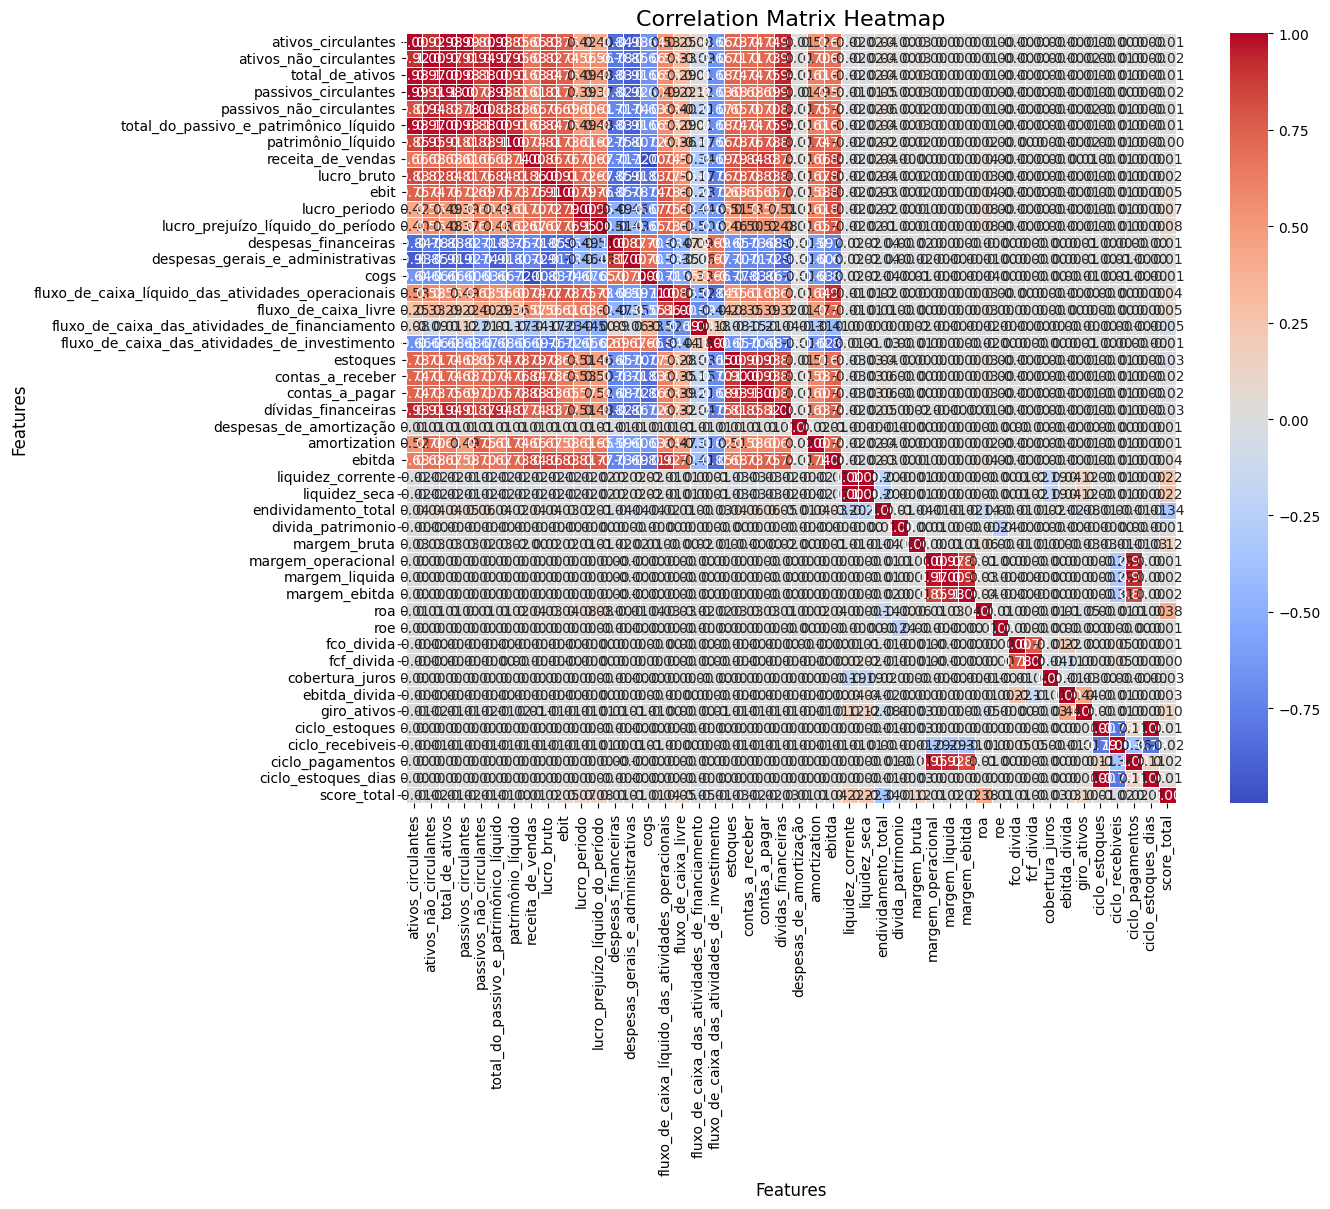

In [6]:
# Set up the matplotlib figure
plt.figure(figsize=(14, 10))

# Create a heatmap using seaborn
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0, square=True, linewidths=.5)

# Titles and labels
plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Features', fontsize=12)

plt.show()

In [7]:
corrs=corr_matrix.loc['score_total'].drop('score_total').sort_values(ascending=False)
corrs

roa                                                   0.384325
liquidez_corrente                                     0.223641
liquidez_seca                                         0.222498
margem_bruta                                          0.124942
giro_ativos                                           0.103732
lucro_prejuízo_líquido_do_período                     0.075817
lucro_periodo                                         0.074813
fluxo_de_caixa_livre                                  0.052916
ebit                                                  0.047599
ebitda                                                0.044807
fluxo_de_caixa_líquido_das_atividades_operacionais    0.039963
ebitda_divida                                         0.027601
margem_ebitda                                         0.023032
lucro_bruto                                           0.019584
margem_liquida                                        0.018680
ciclo_pagamentos                                      0

In [8]:
import phik
from phik import resources, report
phi_k_corr = df_corr.phik_matrix()

interval columns not set, guessing: ['ativos_circulantes', 'ativos_não_circulantes', 'total_de_ativos', 'passivos_circulantes', 'passivos_não_circulantes', 'total_do_passivo_e_patrimônico_líquido', 'patrimônio_líquido', 'receita_de_vendas', 'lucro_bruto', 'ebit', 'lucro_periodo', 'lucro_prejuízo_líquido_do_período', 'despesas_financeiras', 'despesas_gerais_e_administrativas', 'cogs', 'fluxo_de_caixa_líquido_das_atividades_operacionais', 'fluxo_de_caixa_livre', 'fluxo_de_caixa_das_atividades_de_financiamento', 'fluxo_de_caixa_das_atividades_de_investimento', 'estoques', 'contas_a_receber', 'contas_a_pagar', 'dívidas_financeiras', 'despesas_de_amortização', 'amortization', 'ebitda', 'liquidez_corrente', 'liquidez_seca', 'endividamento_total', 'divida_patrimonio', 'margem_bruta', 'margem_operacional', 'margem_liquida', 'margem_ebitda', 'roa', 'roe', 'fco_divida', 'fcf_divida', 'cobertura_juros', 'ebitda_divida', 'giro_ativos', 'ciclo_estoques', 'ciclo_recebiveis', 'ciclo_pagamentos', 'cic

In [9]:
phi_k_corr

,ativos_circulantes,ativos_não_circulantes,total_de_ativos,passivos_circulantes,passivos_não_circulantes,total_do_passivo_e_patrimônico_líquido,patrimônio_líquido,receita_de_vendas,lucro_bruto,ebit,...,fco_divida,fcf_divida,cobertura_juros,ebitda_divida,giro_ativos,ciclo_estoques,ciclo_recebiveis,ciclo_pagamentos,ciclo_estoques_dias,score_total
ativos_circulantes,1.000000,0.956728,0.991791,0.985686,0.933780,0.991791,0.917932,0.752920,0.811524,0.761388,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ativos_não_circulantes,0.956728,1.000000,0.968741,0.958251,0.946245,0.968741,0.952957,0.788066,0.799390,0.791097,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
total_de_ativos,0.991791,0.968741,1.000000,0.982275,0.944528,1.000000,0.937298,0.775706,0.789492,0.808381,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
passivos_circulantes,0.985686,0.958251,0.982275,1.000000,0.925098,0.982275,0.899898,0.732821,0.797075,0.810862,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
passivos_não_circulantes,0.933780,0.946245,0.944528,0.925098,1.000000,0.944528,0.925411,0.797614,0.832328,0.802089,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
total_do_passivo_e_patrimônico_líquido,0.991791,0.968741,1.000000,0.982275,0.944528,1.000000,0.937298,0.775706,0.789492,0.808381,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
patrimônio_líquido,0.917932,0.952957,0.937298,0.899898,0.925411,0.937298,1.000000,0.766538,0.836224,0.836432,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
receita_de_vendas,0.752920,0.788066,0.775706,0.732821,0.797614,0.775706,0.766538,1.000000,0.846573,0.935484,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
lucro_bruto,0.811524,0.799390,0.789492,0.797075,0.832328,0.789492,0.836224,0.846573,1.000000,0.871502,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ebit,0.761388,0.791097,0.808381,0.810862,0.802089,0.808381,0.836432,0.935484,0.871502,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [10]:
phik_corrs=phi_k_corr.loc['score_total'].drop('score_total').sort_values(ascending=False)
phik_corrs

margem_bruta                                          0.209304
liquidez_seca                                         0.181138
liquidez_corrente                                     0.180582
roa                                                   0.121702
giro_ativos                                           0.118531
endividamento_total                                   0.097814
lucro_prejuízo_líquido_do_período                     0.081610
ebitda_divida                                         0.066452
fcf_divida                                            0.062567
cobertura_juros                                       0.049830
roe                                                   0.040583
lucro_periodo                                         0.034231
ebitda                                                0.033227
ciclo_recebiveis                                      0.025784
fluxo_de_caixa_líquido_das_atividades_operacionais    0.022795
fco_divida                                            0

In [11]:
# Features and target
X = df.drop(columns=['score_total','companycode','ano','periodo','data'])
y = df['score_total']

In [12]:
X.columns.to_list()

['ativos_circulantes',
 'ativos_não_circulantes',
 'total_de_ativos',
 'passivos_circulantes',
 'passivos_não_circulantes',
 'total_do_passivo_e_patrimônico_líquido',
 'patrimônio_líquido',
 'receita_de_vendas',
 'lucro_bruto',
 'ebit',
 'lucro_periodo',
 'lucro_prejuízo_líquido_do_período',
 'despesas_financeiras',
 'despesas_gerais_e_administrativas',
 'cogs',
 'fluxo_de_caixa_líquido_das_atividades_operacionais',
 'fluxo_de_caixa_livre',
 'fluxo_de_caixa_das_atividades_de_financiamento',
 'fluxo_de_caixa_das_atividades_de_investimento',
 'estoques',
 'contas_a_receber',
 'contas_a_pagar',
 'dívidas_financeiras',
 'despesas_de_amortização',
 'amortization',
 'ebitda',
 'liquidez_corrente',
 'liquidez_seca',
 'endividamento_total',
 'divida_patrimonio',
 'margem_bruta',
 'margem_operacional',
 'margem_liquida',
 'margem_ebitda',
 'roa',
 'roe',
 'fco_divida',
 'fcf_divida',
 'cobertura_juros',
 'ebitda_divida',
 'giro_ativos',
 'ciclo_estoques',
 'ciclo_recebiveis',
 'ciclo_pagamentos

In [13]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Build da pipeline Linear Regression
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

In [15]:
# Fit model
print('Treinando o modelo')
pipeline.fit(X_train, y_train)
print('Modelo treinado com sucesso!')

Treinando o modelo
Modelo treinado com sucesso!


In [16]:
# Predictions
y_pred = pipeline.predict(X_test)

In [17]:
# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
r2 = r2_score(y_test, y_pred)

In [18]:
# Results summary
metrics = {
    'MAE': mae,
    'MSE': mse,
    'RMSE': rmse,
    'MAPE': mape,
    'R²': r2
}

In [19]:
# Display results
metrics_df = pd.DataFrame([metrics])
metrics_df

,MAE,MSE,RMSE,MAPE,R²
0,0.431865,0.283259,0.532221,27.097181,0.337109


In [20]:
# Residuals
residuals = y_test - y_pred

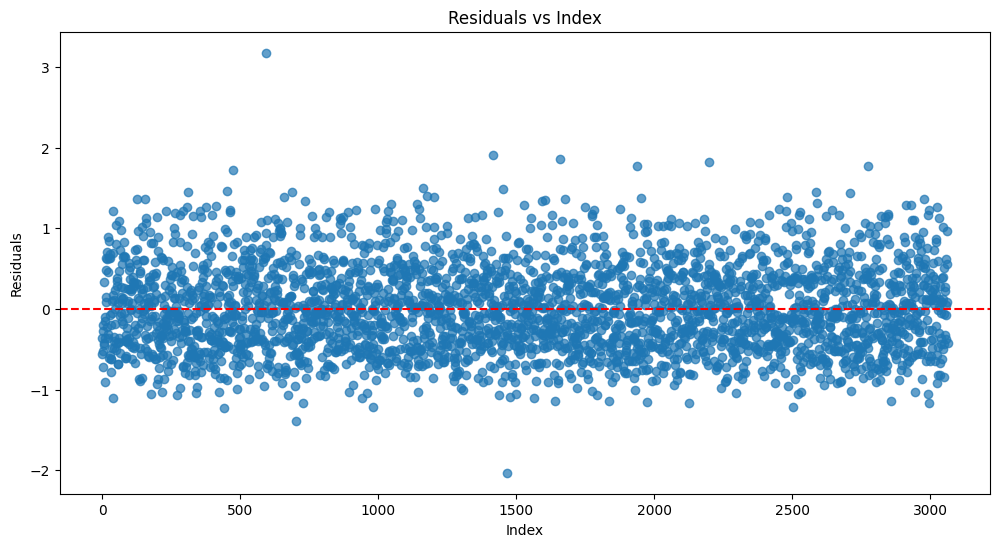

In [21]:
# Plot residuals vs index
plt.figure(figsize=(12, 6))
plt.scatter(range(len(residuals)), residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Index')
plt.xlabel('Index')
plt.ylabel('Residuals')
plt.show()

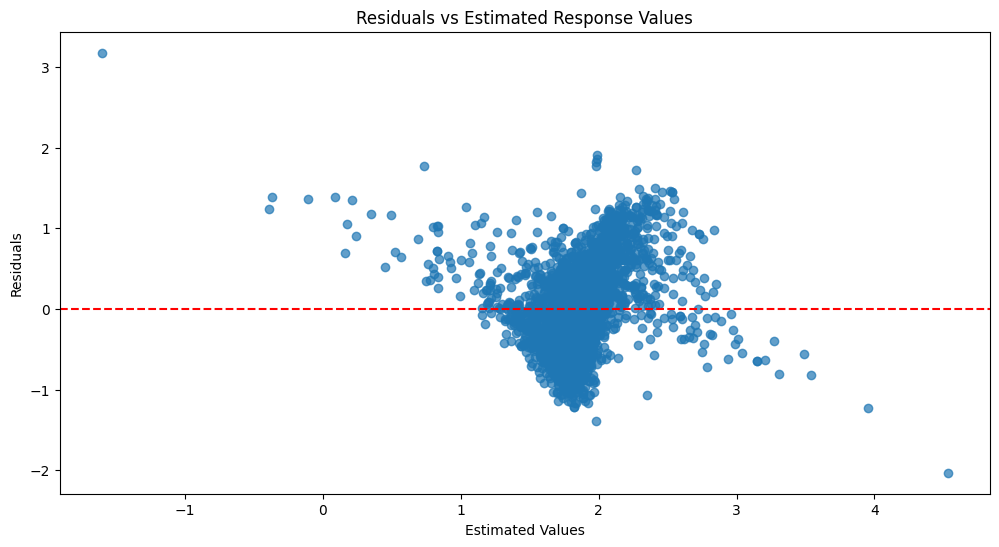

In [22]:
# Residuals vs estimated response values
plt.figure(figsize=(12, 6))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Estimated Response Values')
plt.xlabel('Estimated Values')
plt.ylabel('Residuals')
plt.show()

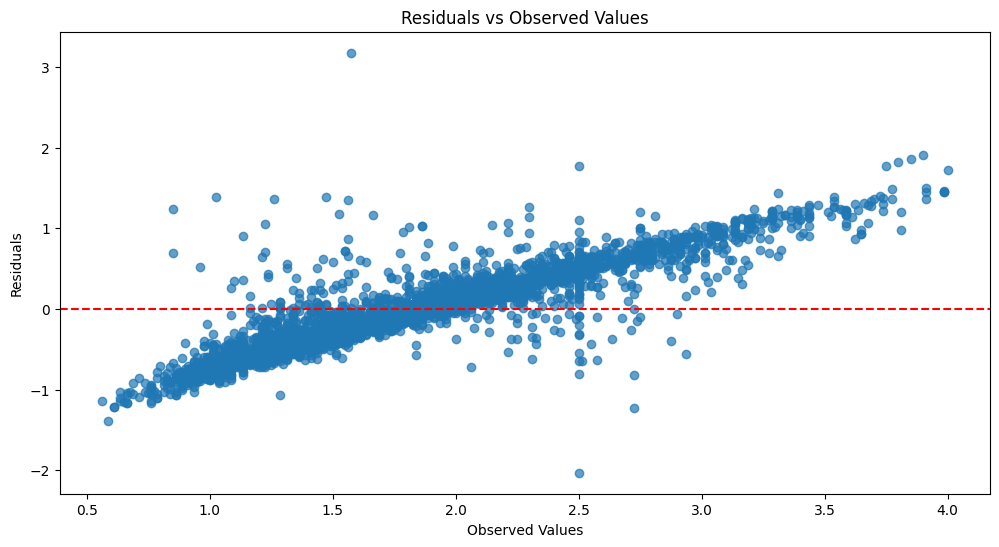

In [23]:
# Residuals vs observations (actual values)
plt.figure(figsize=(12, 6))
plt.scatter(y_test, residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Observed Values')
plt.xlabel('Observed Values')
plt.ylabel('Residuals')
plt.show()

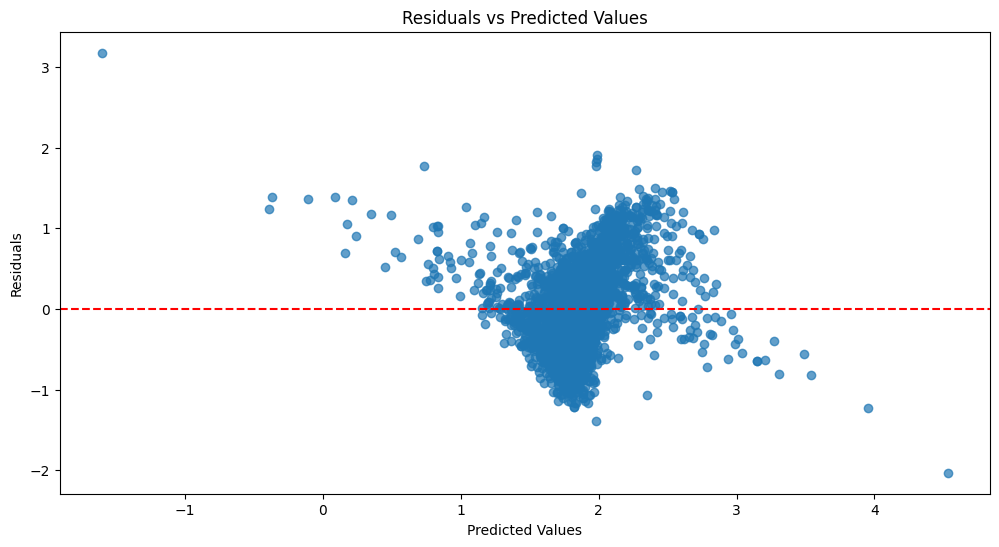

In [24]:
# Residuals vs predicted values
plt.figure(figsize=(12, 6))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

In [25]:
# --- PIPELINE 2: RANDOM FOREST ---
pipeline_rf = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value=0)), 
    ('scaler', StandardScaler()),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1))
])

In [26]:
print("\nTreinando o modelo RandomForestRegressor...")
pipeline_rf.fit(X_train, y_train)
print("Modelo RandomForestRegressor treinado com sucesso.")


Treinando o modelo RandomForestRegressor...
Modelo RandomForestRegressor treinado com sucesso.


In [27]:
# 2. Previsões e Métricas (Random Forest)
y_pred_rf = pipeline_rf.predict(X_test)
metrics_rf = {
    'Modelo': 'Random Forest',
    'MAE': mean_absolute_error(y_test, y_pred_rf),
    'MSE': mean_squared_error(y_test, y_pred_rf),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_rf)),
    'MAPE (%)': np.mean(np.abs((y_test - y_pred_rf) / (y_test + 1e-6))) * 100,
    'R²': r2_score(y_test, y_pred_rf)
}
metrics_rf_df= pd.DataFrame([metrics_rf])
metrics_rf_df

,Modelo,MAE,MSE,RMSE,MAPE (%),R²
0,Random Forest,0.06614,0.00896,0.094659,3.887632,0.979031


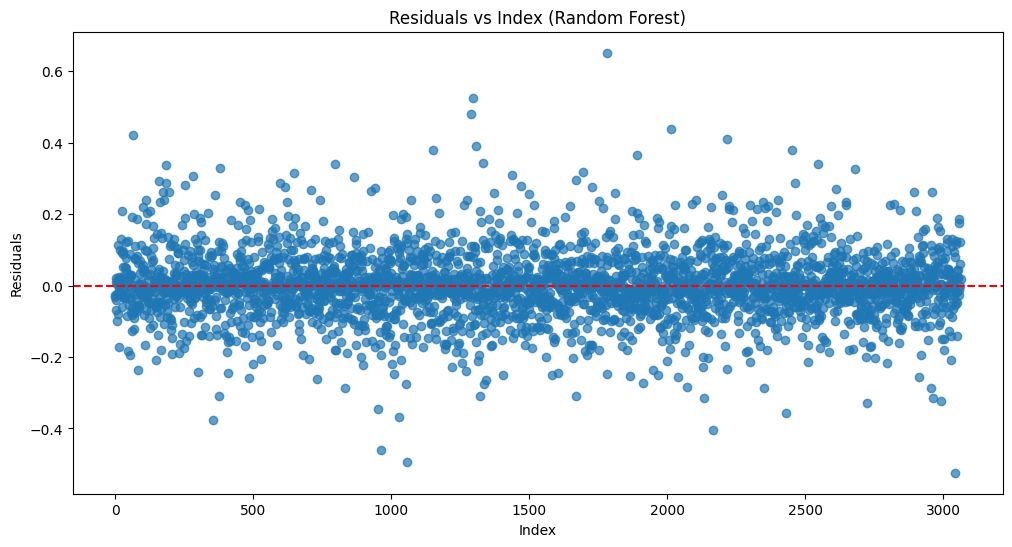

In [28]:
# Residuals para Random Forest
residuals_rf = y_test - y_pred_rf

# Plot residuals vs index para Random Forest
plt.figure(figsize=(12, 6))
plt.scatter(range(len(residuals_rf)), residuals_rf, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Index (Random Forest)')
plt.xlabel('Index')
plt.ylabel('Residuals')
plt.show()

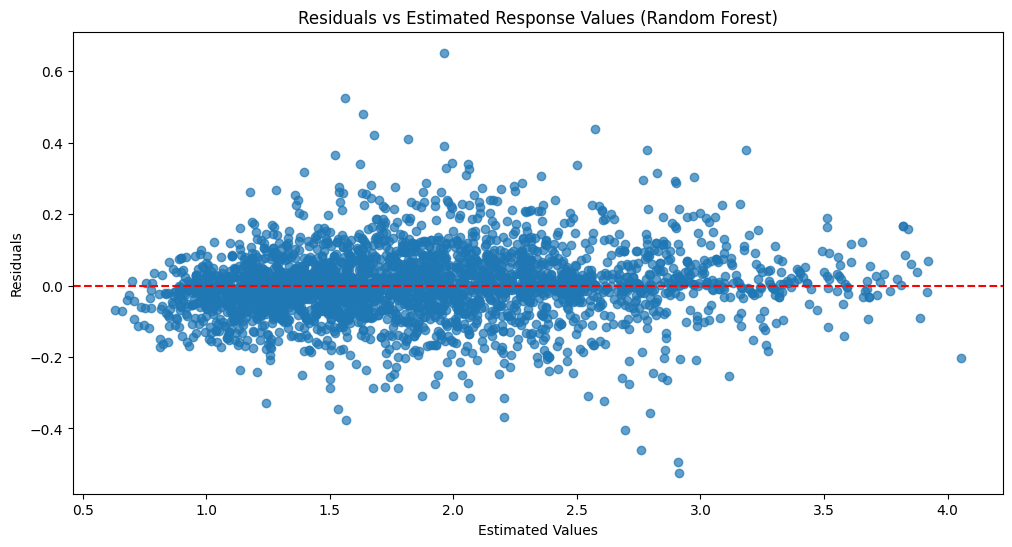

In [29]:
# Residuals vs estimated response values para Random Forest
plt.figure(figsize=(12, 6))
plt.scatter(y_pred_rf, residuals_rf, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Estimated Response Values (Random Forest)')
plt.xlabel('Estimated Values')
plt.ylabel('Residuals')
plt.show()

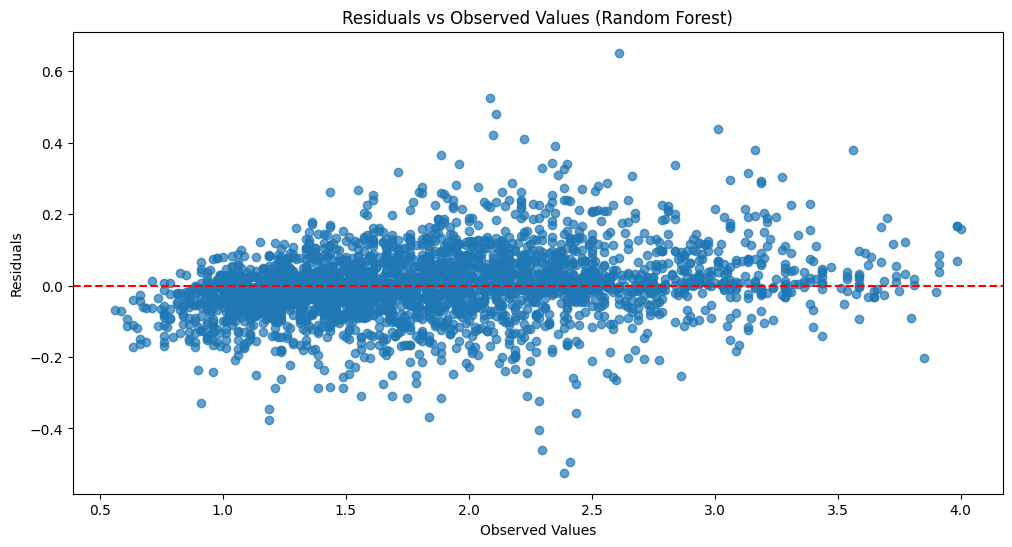

In [30]:
# Residuals vs observations (actual values) para Random Forest
plt.figure(figsize=(12, 6))
plt.scatter(y_test, residuals_rf, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Observed Values (Random Forest)')
plt.xlabel('Observed Values')
plt.ylabel('Residuals')
plt.show()

In [31]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, make_scorer
import numpy as np

In [32]:
# Definir modelo
model = RandomForestRegressor(random_state=42)


In [33]:
# Definir KFold
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
kfold

KFold(n_splits=5, random_state=42, shuffle=True)

In [34]:
# Definir métrica de avaliação
#mae_scorer = make_scorer(mean_absolute_error)

In [35]:
# Aplicar validação cruzada
#mae_scores = cross_val_score(model, X, y, cv=kfold, scoring=mae_scorer)

In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [37]:
# Listas para armazenar métricas
mae_list, mse_list, rmse_list, mape_list, r2_list = [], [], [], [], []

# Loop pelos folds
for train_index, val_index in kfold.split(X):
    X_train_fold, X_val_fold = X.iloc[train_index], X.iloc[val_index]
    y_train_fold, y_val_fold = y.iloc[train_index], y.iloc[val_index]

    model = RandomForestRegressor(random_state=42)
    model.fit(X_train_fold, y_train_fold)
    y_pred = model.predict(X_val_fold)

    # Calcular métricas
    mae = mean_absolute_error(y_val_fold, y_pred)
    mse = mean_squared_error(y_val_fold, y_pred)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((y_val_fold - y_pred) / y_val_fold)) * 100
    r2 = r2_score(y_val_fold, y_pred)

    # Armazenar
    mae_list.append(mae)
    mse_list.append(mse)
    rmse_list.append(rmse)
    mape_list.append(mape)
    r2_list.append(r2)

# Resultados Médios
print("Validação Cruzada (K-Fold = 5):")
print(f"MAE médio: {np.mean(mae_list):.4f}")
print(f"MSE médio: {np.mean(mse_list):.4f}")
print(f"RMSE médio: {np.mean(rmse_list):.4f}")
print(f"MAPE médio (%): {np.mean(mape_list):.4f}")
print(f"R² médio: {np.mean(r2_list):.4f}")


Validação Cruzada (K-Fold = 5):
MAE médio: 0.0665
MSE médio: 0.0093
RMSE médio: 0.0963
MAPE médio (%): 3.9228
R² médio: 0.9787


In [38]:
#print("Validação Cruzada (K-Fold):")
#print(f"MAE médio: {mae_scores.mean():.4f}")
#print(f"MAE desvio-padrão: {mae_scores.std():.4f}")

In [39]:
# Separar último ano como teste (ex: 2023)
df_train = df[df['data'] < '2023-01-01']
df_test  = df[df['data'] >= '2023-01-01']

In [40]:
# Features e target corretos
feat = df_train.drop(columns=['score_total','companycode','ano','periodo','data']).columns.to_list()

In [41]:

X_train = df_train[feat]
y_train = df_train['score_total']

In [42]:
X_test = df_test[feat]
y_test = df_test['score_total']

In [43]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsample

In [44]:
# Prever
y_pred = model.predict(X_test)

# Avaliação
mae  = mean_absolute_error(y_test, y_pred)
mse  = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2   = r2_score(y_test, y_pred)

print("\nValidação Temporal (Holdout - Teste em 2023):")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")



Validação Temporal (Holdout - Teste em 2023):
MAE: 0.0991
MSE: 0.0172
RMSE: 0.1311
R²: 0.9569


In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Lucas\AppData\Local\Temp\ipykernel_20568\4162178265.py:12: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Lucas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


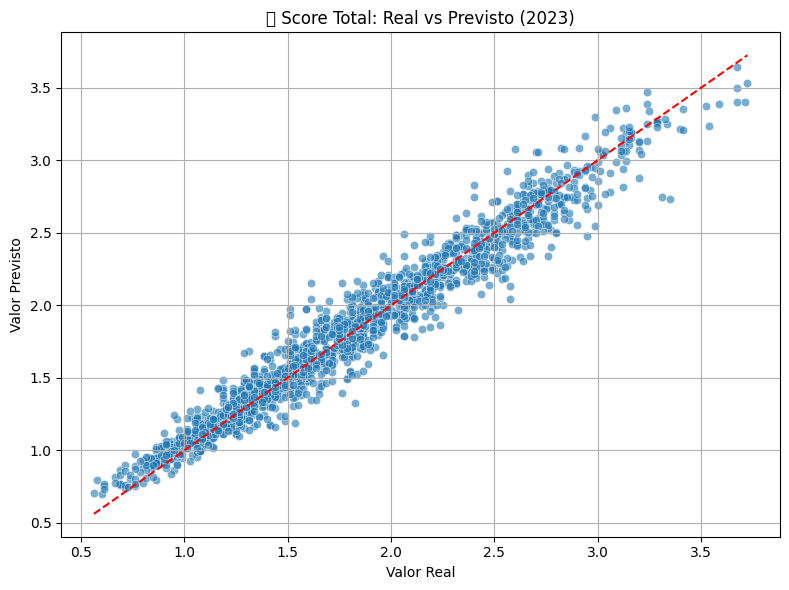

In [46]:
# Previsão
y_pred = model.predict(X_test)

# Gráfico
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel('Valor Real')
plt.ylabel('Valor Previsto')
plt.title('📊 Score Total: Real vs Previsto (2023)')
plt.grid(True)
plt.tight_layout()
plt.show()


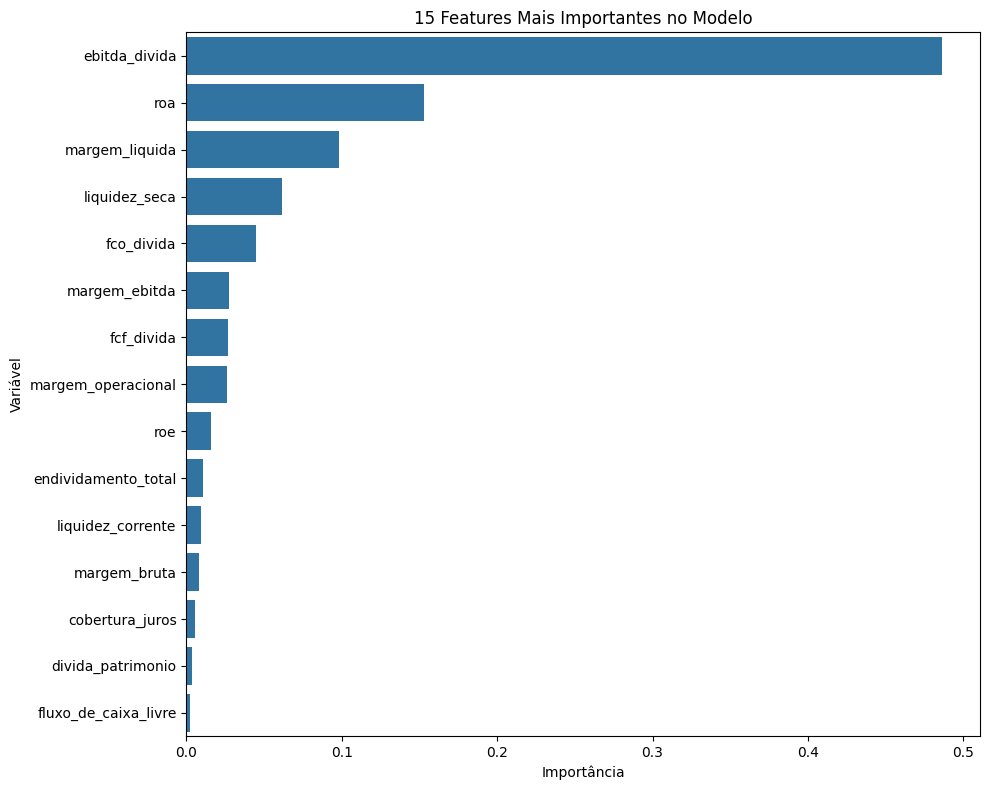

In [47]:
import pandas as pd

# Importância
importances = model.feature_importances_
feat_importance = pd.Series(importances, index=feat).sort_values(ascending=False)

# Gráfico
plt.figure(figsize=(10, 8))
sns.barplot(x=feat_importance.values[:15], y=feat_importance.index[:15])
plt.title('15 Features Mais Importantes no Modelo')
plt.xlabel('Importância')
plt.ylabel('Variável')
plt.tight_layout()
plt.show()


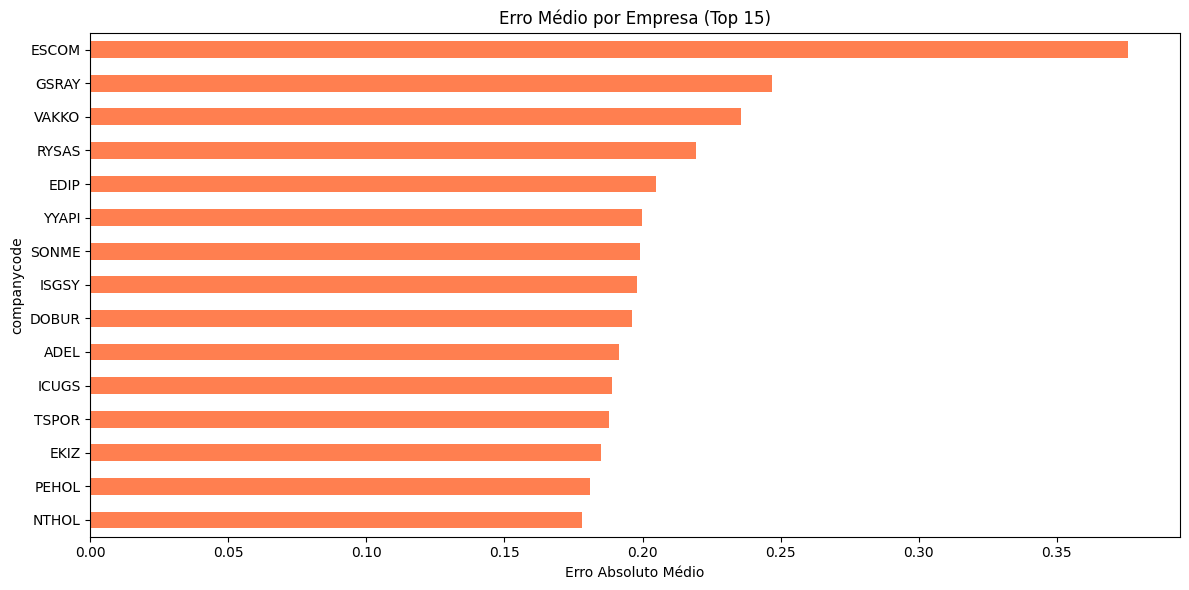

In [48]:
# Adiciona erro absoluto à base de teste
df_test = df_test.copy()
df_test['y_pred'] = y_pred
df_test['erro_absoluto'] = abs(df_test['score_total'] - df_test['y_pred'])

# Agrupamento por empresa
erro_por_empresa = df_test.groupby('companycode')['erro_absoluto'].mean().sort_values(ascending=False)

# Gráfico
plt.figure(figsize=(12, 6))
erro_por_empresa.head(15).plot(kind='barh', color='coral')
plt.xlabel('Erro Absoluto Médio')
plt.title('Erro Médio por Empresa (Top 15)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [49]:
import shap

# Criar explainer SHAP (para modelos baseados em árvore)
#explainer = shap.TreeExplainer(model)

# Calcular valores SHAP (pode demorar para muitos dados)
#shap_values = explainer.shap_values(X_test)


C:\Users\Lucas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [50]:
# Sumário global: impacto médio de cada variável
#shap.summary_plot(shap_values, X_test, plot_type="bar")


In [51]:
# Mostra como cada feature afeta o output (positivo ou negativo)
#shap.summary_plot(shap_values, X_test)


In [52]:
# Exemplo: primeira empresa do conjunto de teste
#idx = 3 # ou use um index específico

# Força da contribuição de cada feature para o score
#shap.plots.waterfall(explainer(X_test.iloc[idx]))


In [53]:
#Isso mostra exatamente por que aquela empresa recebeu aquele score — quais indicadores ajudaram ou prejudicaram a nota.

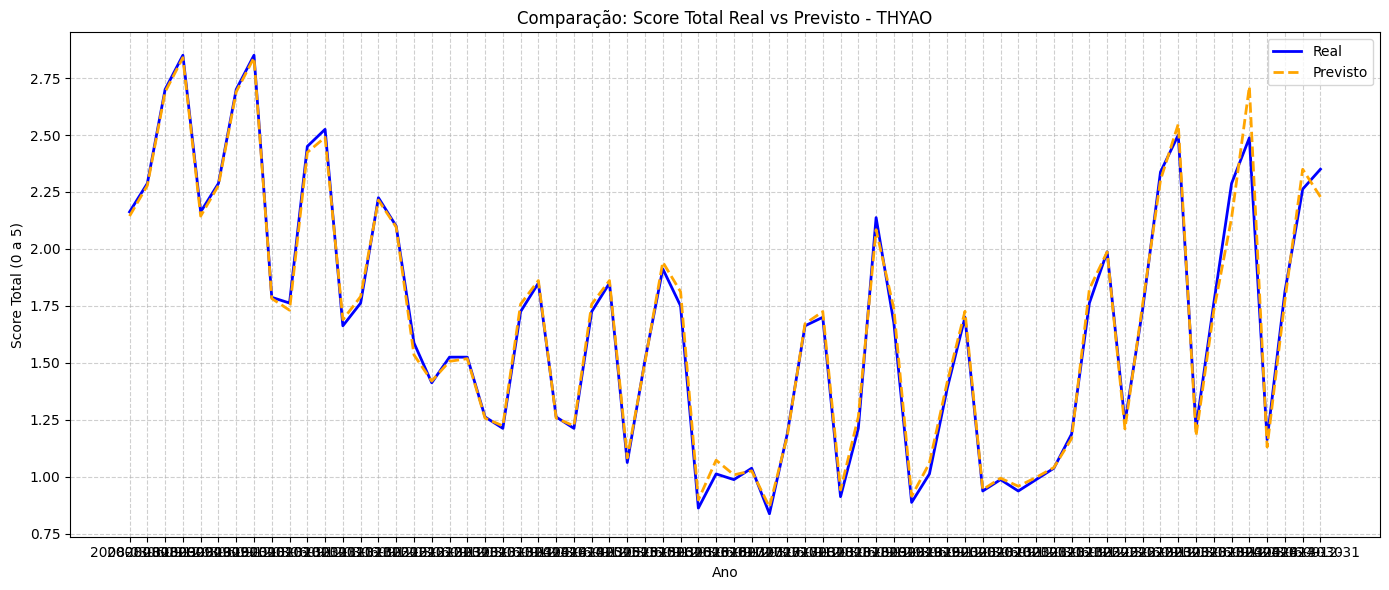

In [54]:
# Filtrar apenas THYAO
df_thyao_real = df[df['companycode'] == 'THYAO'].copy()

# Prever usando o modelo treinado (usando todas as colunas de features já conhecidas)
X_thyao = df_thyao_real.drop(columns=['score_total', 'companycode', 'ano', 'periodo', 'data'])
y_thyao_pred = model.predict(X_thyao)

# Adicionar coluna de previsão ao DataFrame
df_thyao_real['score_predito'] = y_thyao_pred

# Plotar
plt.figure(figsize=(14, 6))
plt.plot(df_thyao_real['data'], df_thyao_real['score_total'], label='Real', color='blue', linewidth=2)
plt.plot(df_thyao_real['data'], df_thyao_real['score_predito'], label='Previsto', color='orange', linestyle='--', linewidth=2)

plt.title('Comparação: Score Total Real vs Previsto - THYAO')
plt.xlabel('Ano')
plt.ylabel('Score Total (0 a 5)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Criar um ranking baseado na média histórica do Score Total
ranking_historico = df.groupby('companycode')['score_total'].mean().sort_values(ascending=False)

# 2. Identificar os extremos
melhor_empresa = ranking_historico.index[0]   # A primeira da lista
pior_empresa = ranking_historico.index[-1]    # A última da lista

# Garantir que não selecionamos a própria THYAO como melhor/pior (para não duplicar)
if melhor_empresa == 'THYAO':
    melhor_empresa = ranking_historico.index[1]
if pior_empresa == 'THYAO':
    pior_empresa = ranking_historico.index[-2]

print(f"✈️ Empresa Foco: THYAO")
print(f"🏆 Melhor Desempenho (Benchmark Positivo): {melhor_empresa} (Média: {ranking_historico[melhor_empresa]:.2f})")
print(f"⚠️ Pior Desempenho (Benchmark Negativo): {pior_empresa} (Média: {ranking_historico[pior_empresa]:.2f})")

# 3. Filtrar o DataFrame apenas para essas 3 empresas
empresas_selecionadas = ['THYAO', melhor_empresa, pior_empresa]
df_comparacao = df[df['companycode'].isin(empresas_selecionadas)].copy()

# Definir uma ordem fixa para as cores nos gráficos
ordem_empresas = [melhor_empresa, 'THYAO', pior_empresa]
paleta_cores = {melhor_empresa: 'green', 'THYAO': 'blue', pior_empresa: 'red'}

✈️ Empresa Foco: THYAO
🏆 Melhor Desempenho (Benchmark Positivo): AKMGY (Média: 3.25)
⚠️ Pior Desempenho (Benchmark Negativo): BURCE (Média: 1.02)


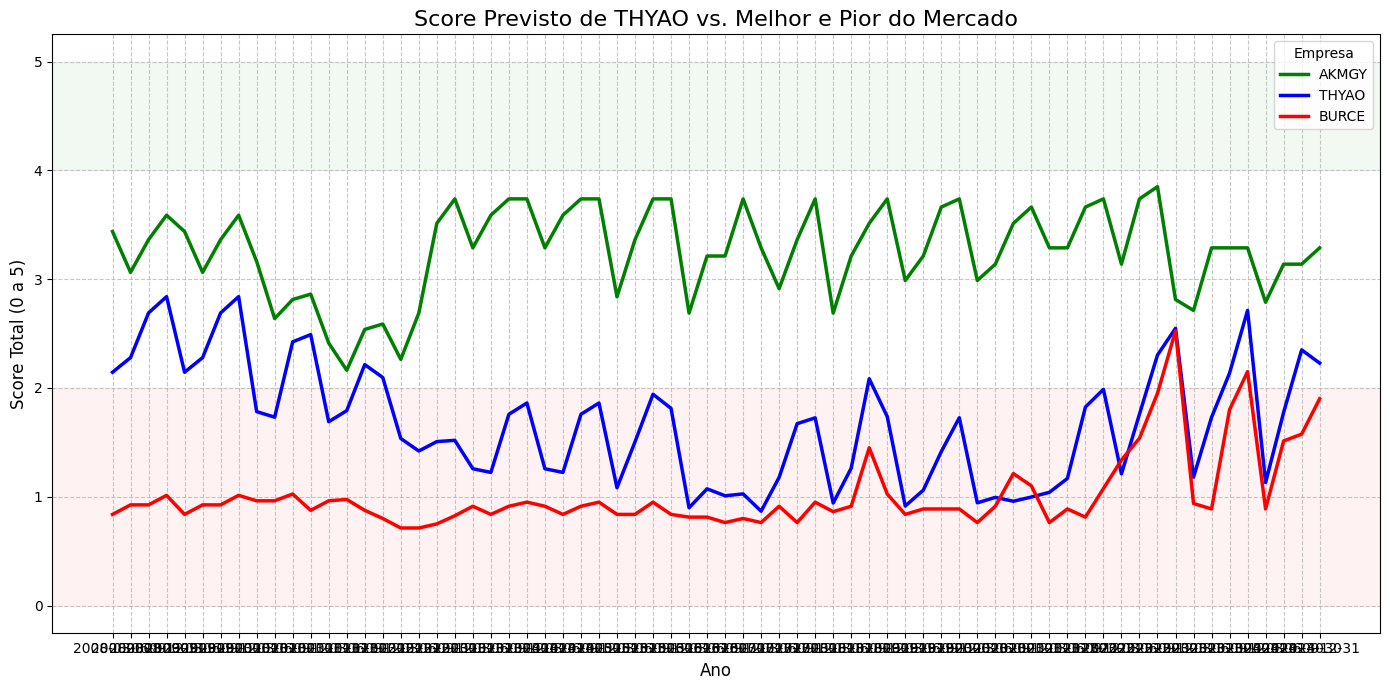

In [56]:
# Usar mesma estrutura do gráfico anterior, mas substituir score de THYAO pelo previsto
df_thyao_pred = df_thyao_real[['data', 'score_predito']].copy()
df_thyao_pred['companycode'] = 'THYAO'
df_thyao_pred.rename(columns={'score_predito': 'score_total'}, inplace=True)

# Substituir os dados de THYAO no gráfico anterior pelos previstos
df_comparacao_previsto = df[df['companycode'].isin([melhor_empresa, pior_empresa])].copy()
df_comparacao_previsto = pd.concat([df_comparacao_previsto, df_thyao_pred], ignore_index=True)

# Plotar
plt.figure(figsize=(14, 7))
sns.lineplot(
    data=df_comparacao_previsto,
    x='data',
    y='score_total',
    hue='companycode',
    palette=paleta_cores,
    hue_order=ordem_empresas,
    linewidth=2.5
)

plt.title('Score Previsto de THYAO vs. Melhor e Pior do Mercado', fontsize=16)
plt.ylabel('Score Total (0 a 5)', fontsize=12)
plt.xlabel('Ano', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Empresa', loc='upper right')
plt.axhspan(4, 5, color='green', alpha=0.05)
plt.axhspan(0, 2, color='red', alpha=0.05)
plt.tight_layout()
plt.show()


In [57]:
# Criar uma cópia do DataFrame original
df_sem_thyao = df[df['companycode'] != 'THYAO'].copy()

# Verificar que THYAO foi removido
print("THYAO removido?", 'THYAO' in df_sem_thyao['companycode'].unique())

THYAO removido? False


In [58]:
df_sem_thyao

,companycode,ano,periodo,ativos_circulantes,ativos_não_circulantes,total_de_ativos,passivos_circulantes,passivos_não_circulantes,total_do_passivo_e_patrimônico_líquido,patrimônio_líquido,...,fco_divida,fcf_divida,cobertura_juros,ebitda_divida,giro_ativos,ciclo_estoques,ciclo_recebiveis,ciclo_pagamentos,ciclo_estoques_dias,score_total
0,ADEL,2008,3_Meses,8.208236e+07,1.600055e+07,9.808291e+07,4.951133e+07,2.498829e+06,9.808291e+07,4.607275e+07,...,-4.509550,-4.664420,-18.401068,0.841152,0.242154,-2.010322,2.374165,-0.169180,-733.767538,2.2875
1,ADEL,2008,6_Meses,8.860061e+07,1.609915e+07,1.046998e+08,5.598390e+07,2.490529e+06,1.046998e+08,4.622534e+07,...,-1.489560,-1.540716,-10.595002,0.513515,0.468567,-0.939450,1.268414,-0.101706,-342.899268,2.4125
2,ADEL,2008,9_Meses,9.400968e+07,1.555129e+07,1.095610e+08,5.475384e+07,2.571602e+06,1.095610e+08,5.223553e+07,...,-1.103726,-1.141631,-6.868930,0.626646,0.687130,-0.628661,0.916802,-0.038461,-229.461288,2.6500
3,ADEL,2008,Anual,4.558265e+07,1.517075e+07,6.075340e+07,8.454967e+06,2.891157e+06,6.075340e+07,4.940728e+07,...,-13.849306,-14.324928,-4.650982,7.076576,1.231006,-0.729009,0.046323,-0.035645,-266.088413,3.0625
4,ADEL,2009,3_Meses,8.208236e+07,1.600055e+07,9.808291e+07,4.951133e+07,2.498829e+06,9.808291e+07,4.607275e+07,...,-4.509550,-4.664420,-18.401068,0.841152,0.242154,-2.010322,2.374165,-0.169180,-733.767538,2.2875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15307,ZOREN,2023,Anual,2.862619e+10,1.136030e+11,1.422292e+11,4.556468e+10,4.111889e+10,1.422292e+11,5.554559e+10,...,0.696156,0.691479,-0.271034,0.154165,0.276943,-0.022592,0.219458,-0.164983,-8.246212,2.0875
15308,ZOREN,2024,3_Meses,1.561239e+10,8.488922e+10,1.005016e+11,2.302628e+10,2.854341e+10,1.005016e+11,4.893194e+10,...,0.155489,0.396787,-0.056555,-0.029762,0.056279,-0.138158,1.307473,-0.711979,-50.427586,1.3125
15309,ZOREN,2024,6_Meses,1.434187e+10,9.238784e+10,1.067297e+11,2.452030e+10,2.823591e+10,1.067297e+11,5.397350e+10,...,0.302358,0.557485,-0.049365,-0.137170,0.101941,-0.083425,0.564702,-0.451721,-30.450156,1.1625
15310,ZOREN,2024,9_Meses,1.539392e+10,9.982602e+10,1.152199e+11,2.703824e+10,2.843158e+10,1.152199e+11,5.975012e+10,...,0.621685,0.871270,-0.119853,0.072841,0.175634,-0.030435,0.318807,-0.273165,-11.108652,1.2875


In [59]:
# Separar treino e teste com base em data (2023 como holdout)
df_train = df_sem_thyao[df_sem_thyao['data'] < '2023-01-01']
df_test  = df_sem_thyao[df_sem_thyao['data'] >= '2023-01-01']

# Definir colunas de features
feat = df_train.drop(columns=['score_total', 'companycode', 'ano', 'periodo', 'data']).columns.tolist()

# Criar conjuntos
X_train = df_train[feat]
y_train = df_train['score_total']
X_test  = df_test[feat]
y_test  = df_test['score_total']

# Treinar modelo
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

model_holdout = RandomForestRegressor(random_state=42)
model_holdout.fit(X_train, y_train)

# Avaliar
y_pred = model_holdout.predict(X_test)
mae  = mean_absolute_error(y_test, y_pred)
mse  = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2   = r2_score(y_test, y_pred)

print("🔍 Holdout - Validação com Empresas (exceto THYAO):")
print(f"MAE: {mae:.4f}, RMSE: {rmse:.4f}, R²: {r2:.4f}")


🔍 Holdout - Validação com Empresas (exceto THYAO):
MAE: 0.0983, RMSE: 0.1304, R²: 0.9575


In [60]:
# Prever THYAO com modelo que nunca a viu
df_thyao = df[df['companycode'] == 'THYAO'].copy()
X_thyao = df_thyao[feat]
df_thyao['score_predito'] = model_holdout.predict(X_thyao)


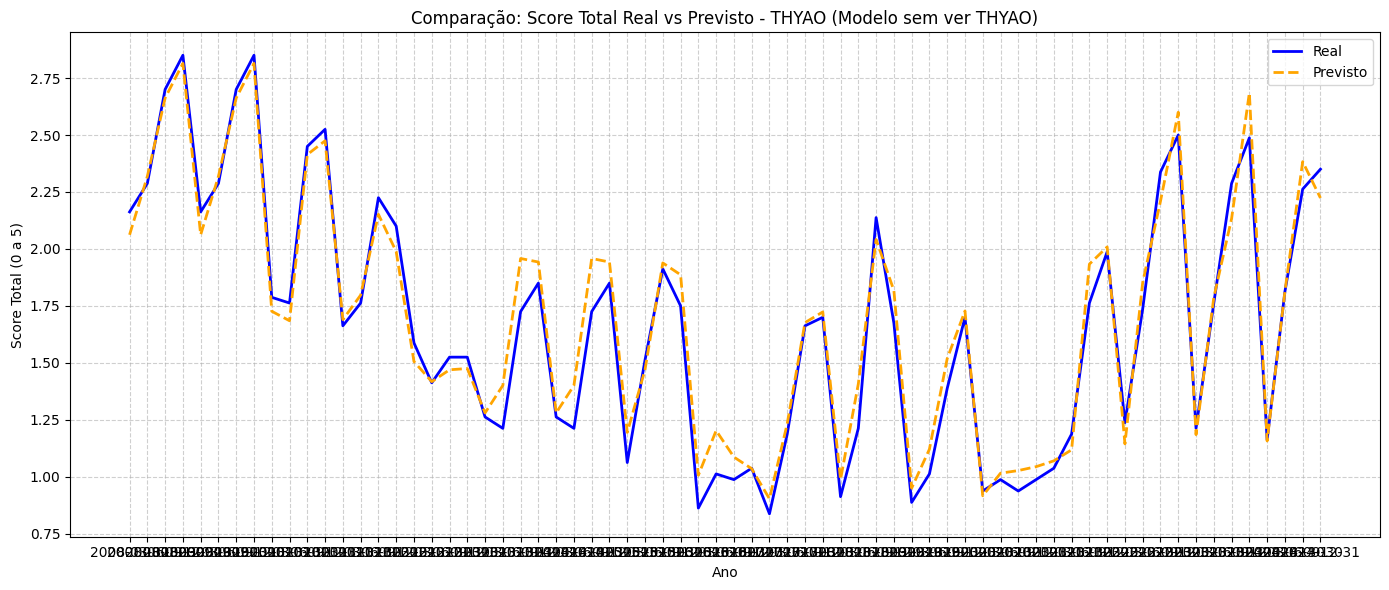

In [61]:
plt.figure(figsize=(14, 6))
plt.plot(df_thyao['data'], df_thyao['score_total'], label='Real', color='blue', linewidth=2)
plt.plot(df_thyao['data'], df_thyao['score_predito'], label='Previsto', color='orange', linestyle='--', linewidth=2)
plt.title('Comparação: Score Total Real vs Previsto - THYAO (Modelo sem ver THYAO)')
plt.xlabel('Ano')
plt.ylabel('Score Total (0 a 5)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


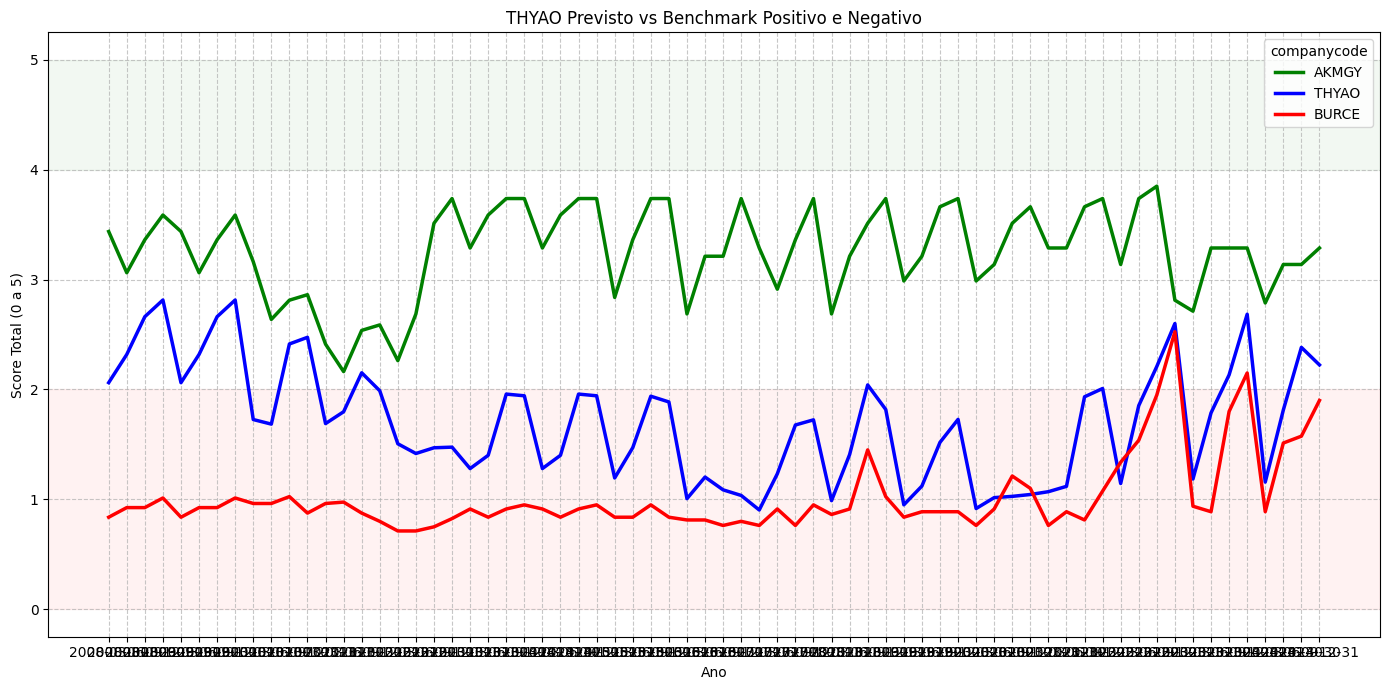

In [62]:
# Selecionar empresas extremas
ranking = df.groupby('companycode')['score_total'].mean().sort_values(ascending=False)
melhor_empresa = ranking.index[0] if ranking.index[0] != 'THYAO' else ranking.index[1]
pior_empresa = ranking.index[-1] if ranking.index[-1] != 'THYAO' else ranking.index[-2]

# Dados reais das outras duas empresas
df_extremos = df[df['companycode'].isin([melhor_empresa, pior_empresa])].copy()

# Substituir dados reais de THYAO pelo previsto
df_thyao_prev = df_thyao[['data', 'score_predito']].copy()
df_thyao_prev['companycode'] = 'THYAO'
df_thyao_prev.rename(columns={'score_predito': 'score_total'}, inplace=True)

# Combinar os três
df_final = pd.concat([df_extremos, df_thyao_prev], ignore_index=True)

# Plotar
plt.figure(figsize=(14, 7))
sns.lineplot(
    data=df_final,
    x='data',
    y='score_total',
    hue='companycode',
    palette={melhor_empresa: 'green', 'THYAO': 'blue', pior_empresa: 'red'},
    hue_order=[melhor_empresa, 'THYAO', pior_empresa],
    linewidth=2.5
)
plt.title('THYAO Previsto vs Benchmark Positivo e Negativo')
plt.axhspan(4, 5, color='green', alpha=0.05)
plt.axhspan(0, 2, color='red', alpha=0.05)
plt.grid(True, linestyle='--', alpha=0.7)
plt.ylabel('Score Total (0 a 5)')
plt.xlabel('Ano')
plt.tight_layout()
plt.show()


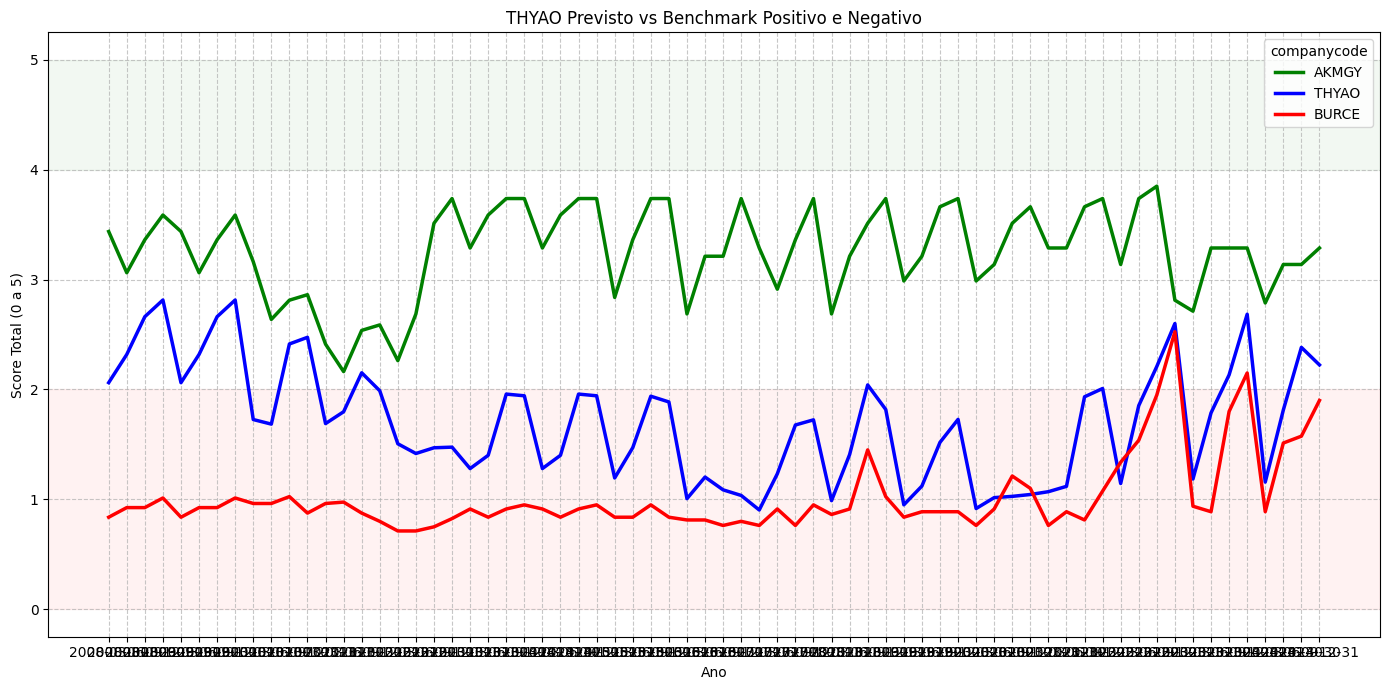

In [63]:
# Selecionar empresas extremas
ranking = df.groupby('companycode')['score_total'].mean().sort_values(ascending=False)
melhor_empresa = ranking.index[0] if ranking.index[0] != 'THYAO' else ranking.index[1]
pior_empresa = ranking.index[-1] if ranking.index[-1] != 'THYAO' else ranking.index[-2]

# Dados reais das outras duas empresas
df_extremos = df[df['companycode'].isin([melhor_empresa, pior_empresa])].copy()

# Substituir dados reais de THYAO pelo previsto
df_thyao_prev = df_thyao[['data', 'score_predito']].copy()
df_thyao_prev['companycode'] = 'THYAO'
df_thyao_prev.rename(columns={'score_predito': 'score_total'}, inplace=True)

# Combinar os três
df_final = pd.concat([df_extremos, df_thyao_prev], ignore_index=True)

# Plotar
plt.figure(figsize=(14, 7))
sns.lineplot(
    data=df_final,
    x='data',
    y='score_total',
    hue='companycode',
    palette={melhor_empresa: 'green', 'THYAO': 'blue', pior_empresa: 'red'},
    hue_order=[melhor_empresa, 'THYAO', pior_empresa],
    linewidth=2.5
)
plt.title('THYAO Previsto vs Benchmark Positivo e Negativo')
plt.axhspan(4, 5, color='green', alpha=0.05)
plt.axhspan(0, 2, color='red', alpha=0.05)
plt.grid(True, linestyle='--', alpha=0.7)
plt.ylabel('Score Total (0 a 5)')
plt.xlabel('Ano')
plt.tight_layout()
plt.show()
